# Regresión lineal simple
---

***Tenga en cuenta que este script es una guía para ayudar en la resolución de los ejercicios. Las consignas, incisos, datasets, tablas, parámetros y/o demás valores utilizados pueden no coincidir con los de la práctica.***

**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [ ]:
MNT_DRIVE_DIR = '/content/drive/'
DRIVE_DIR = '/content/drive/MyDrive/'
DATOS_DIR = DRIVE_DIR + 'Colab Notebooks/Datos/'
FUENTES_DIR = DRIVE_DIR + 'Colab Notebooks/Fuentes'

from google.colab import drive
drive.mount(MNT_DRIVE_DIR)

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Mounted at /content/drive/


#    Variantes del Descenso del Gradiente
**Descenso del Gradiente por Lotes (Batch Gradient Descent):**

* Calcula el gradiente utilizando todo el conjunto de datos en cada época.
* Ajusta los pesos una vez por época en función del gradiente global promedio.
* Adecuado para conjuntos de datos pequeños o medianos, pero costoso en conjuntos de datos grandes.

**Descenso de Gradiente Estocástico (Stocastic Gradient Descent):**

* Calcula el gradiente utilizando un solo ejemplo a la vez en cada iteración.
* Ajusta los pesos después de cada ejemplo.
* Converge más rápido, especialmente en conjuntos de datos grandes, pero con mayor variabilidad en la dirección del gradiente debido a la estocasticidad.

**Descenso del Gradiente por Mini-lotes (Mini-Batch Gradient Descent):**

* Calcula el gradiente utilizando un mini-lote (un pequeño subconjunto de ejemplos) en cada iteración.
* Ajusta los pesos después de cada mini-lote.
* Equilibra la eficiencia y la estabilidad del gradiente, utilizado comúnmente en prácticas de entrenamiento.

---

**Error Cuadrático Medio  (Mean Square Error)**
$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 \\
$$


Donde:

- $MSE$ es el Error Cuadrático Medio.
- $m$ es el número de observaciones o ejemplos del conjunto de datos.
- $y_i$ es el valor real (que se quiere predecir) del ejemplo $i$.
- $\hat{y}_i$ es la predicción del modelo para el ejemplo $i$.




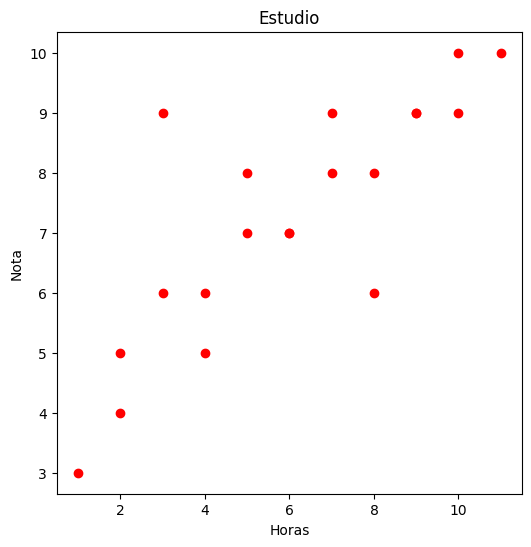

array([[1.        , 0.81072217],
       [0.81072217, 1.        ]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import meshgrid #,imshow,contour
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# Valores para "Horas de Estudio" (en horas)
horas_estudio = [2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 11]

# Valores para "Nota" (en una escala de 0 a 10, correlacionados positivamente)
nota_materia = [5, 6, 6, 7, 7, 8, 8, 9, 9, 4, 9, 5, 8, 7, 9, 6, 9, 10, 3, 10]

X = np.array(horas_estudio)
Y = np.array(nota_materia)

# grafica para ver correlación
plt.figure(figsize=(6,6))
plt.plot(X, Y,'o', color='red')
plt.title('Estudio')
plt.xlabel('Horas')
plt.ylabel('Nota')
plt.show()

np.corrcoef(X, Y)

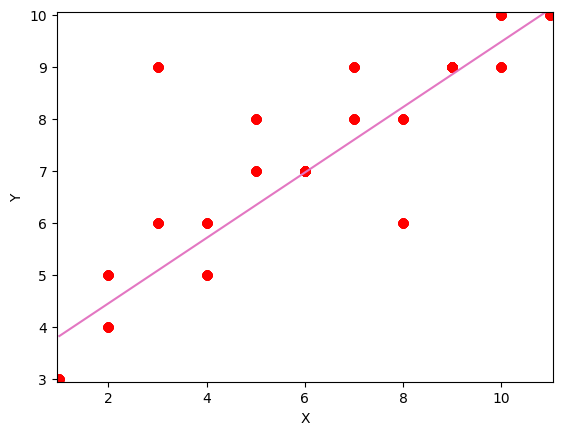

w = 0.6283619090631749
b = 3.1992013940087225
Errores:
  0 => 399.057578
  1 => 92.352469
  2 => 89.829095
  3 => 87.615618
  4 => 85.485242
  5 => 83.434207
  6 => 81.459546
  7 => 79.558402
  8 => 77.728027
  9 => 75.965774
 10 => 74.269097
 11 => 72.635545
 12 => 71.062758
 13 => 69.548465
 14 => 68.090481
 15 => 66.686700
 16 => 65.335098
 17 => 64.033726
 18 => 62.780707
 19 => 61.574234
 20 => 60.412571
 21 => 59.294042
 22 => 58.217038
 23 => 57.180008
 24 => 56.181460
 25 => 55.219958
 26 => 54.294118
 27 => 53.402610
 28 => 52.544153
 29 => 51.717514
 30 => 50.921505
 31 => 50.154985
 32 => 49.416853
 33 => 48.706050
 34 => 48.021559
 35 => 47.362398
 36 => 46.727622
 37 => 46.116324
 38 => 45.527628
 39 => 44.960691
 40 => 44.414704
 41 => 43.888887
 42 => 43.382487
 43 => 42.894782
 44 => 42.425076
 45 => 41.972700
 46 => 41.537007
 47 => 41.117378
 48 => 40.713214
 49 => 40.323941
 50 => 39.949004
 51 => 39.587872
 52 => 39.240029
 53 => 38.904983
 54 => 38.582258
 55 => 38

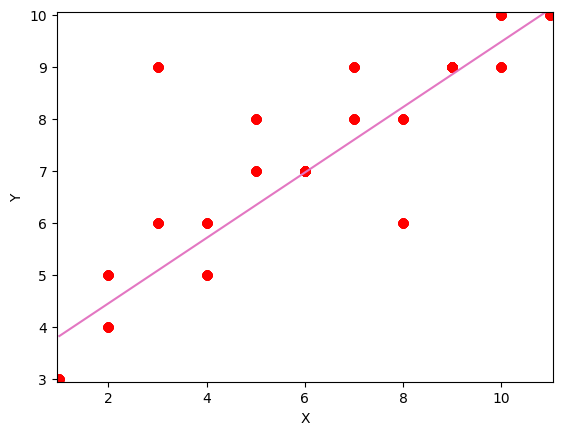

In [ ]:
from ClassNeuronaLineal import NeuronaLineal


x_train = X.reshape(-1,1)    # selecciona entradas y formatea a Nx1
y_train = Y.reshape(-1,1)    # selecciona salidas y formatea a Nx1

# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.005, n_iter=500, cotaE=0.1, draw=1, title=['X', 'Y'])
modelo = modelo.fit(x_train, y_train)
print('w =', modelo.w_[0])
print('b =', modelo.b_[0])

# imprime errores de cada iteracion:
print('Errores:')
for i, err in enumerate(modelo.errors_):
    print('%3d => %f' % (i, err[0]))


dato = 9 # horas de estudio dedicadas
print('Quien dedicó %d horas de estudio sacará un %d como nota en el examen' % (dato, modelo.predict([dato])[0]))   # prediccion

In [ ]:
# prueba con pesos de otro entrenamiento
#w = 0.6281767157431366
#b = 3.2010171504435605
modelo.w_ = [0.63]
modelo.b_ = [3.20]

for i in range(1, 12):
    dato = i # horas de estudio dedicadas
    print('Quien dedicó %2d horas de estudio sacará un %2d como nota en el examen' % (dato, modelo.predict([dato])[0]))   # prediccion

Quien dedicó  1 horas de estudio sacará un  3 como nota en el examen
Quien dedicó  2 horas de estudio sacará un  4 como nota en el examen
Quien dedicó  3 horas de estudio sacará un  5 como nota en el examen
Quien dedicó  4 horas de estudio sacará un  5 como nota en el examen
Quien dedicó  5 horas de estudio sacará un  6 como nota en el examen
Quien dedicó  6 horas de estudio sacará un  6 como nota en el examen
Quien dedicó  7 horas de estudio sacará un  7 como nota en el examen
Quien dedicó  8 horas de estudio sacará un  8 como nota en el examen
Quien dedicó  9 horas de estudio sacará un  8 como nota en el examen
Quien dedicó 10 horas de estudio sacará un  9 como nota en el examen
Quien dedicó 11 horas de estudio sacará un 10 como nota en el examen
